In [37]:
# 1. Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import random

In [38]:
# 2. Load the dataset and split into train and test sets
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP 5/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP 5/fashion-mnist_test.csv')
# train_df.head()
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [39]:
# 3. Normalize and reshape the pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 4. One hot encoding the labels
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [40]:
# 5. list of class names for identification of clothing images

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

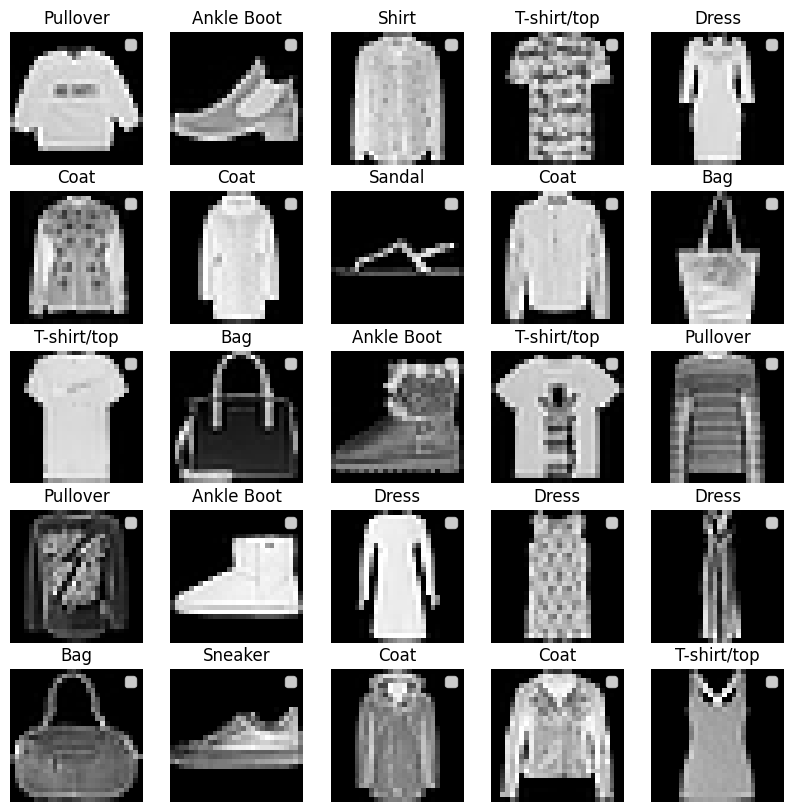

In [41]:
# 6. Visualization of training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='grey')
    plt.title(class_names[y_train[i]])
    plt.legend()
    plt.axis('off')
plt.show()

In [43]:
# 7. defining the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 8. compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 9. training the model
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_test, y_test_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.4547 - loss: 1.5284 - val_accuracy: 0.7168 - val_loss: 0.8629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.7030 - loss: 0.8607 - val_accuracy: 0.7391 - val_loss: 0.7637
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7319 - loss: 0.7608 - val_accuracy: 0.7568 - val_loss: 0.7099
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7562 - loss: 0.7018 - val_accuracy: 0.7574 - val_loss: 0.6695
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7695 - loss: 0.6628 - val_accuracy: 0.7716 - val_loss: 0.6517
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.7798 - loss: 0.6333 - val_accuracy: 0.7835 - val_loss: 0.6075
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7896 - loss: 0.5984 - val_accuracy: 0.7924 - val_loss: 0.5909
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7991 -

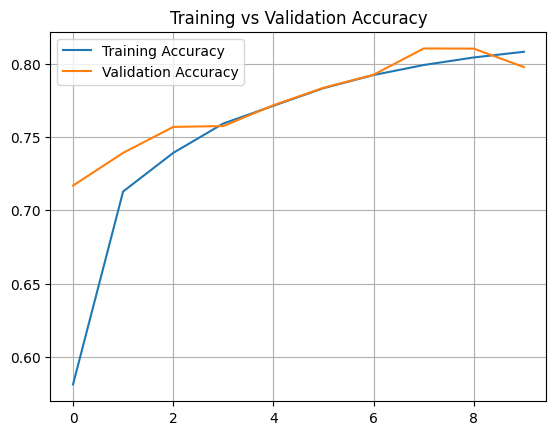

In [44]:
# 10. plotting training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [45]:
# 11. evaluating the model on test data
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {100*accuracy:.2f}%")

# 12. making predictions and classification report
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis=1)

print(metrics.classification_report(y_test, pred_labels, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7951 - loss: 0.5716
Test Accuracy: 79.76%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.73      0.77      1000
    Trousers       0.97      0.94      0.96      1000
    Pullover       0.86      0.63      0.73      1000
       Dress       0.71      0.89      0.79      1000
        Coat       0.50      0.88      0.64      1000
      Sandal       0.88      0.96      0.91      1000
       Shirt       0.63      0.27      0.38      1000
     Sneaker       0.95      0.82      0.88      1000
         Bag       0.97      0.92      0.94      1000
  Ankle Boot       0.88      0.93      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.79     10000
weighted avg       0.82      0.80      0.79     10000



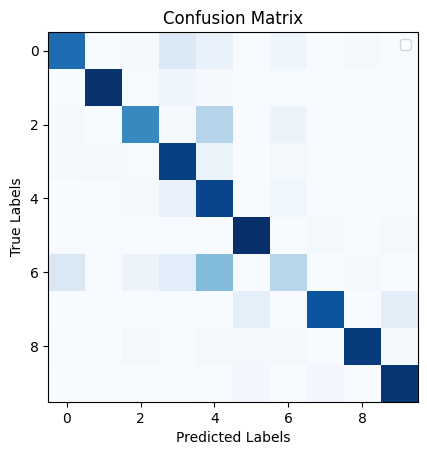

In [46]:
# 13. Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred_labels)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


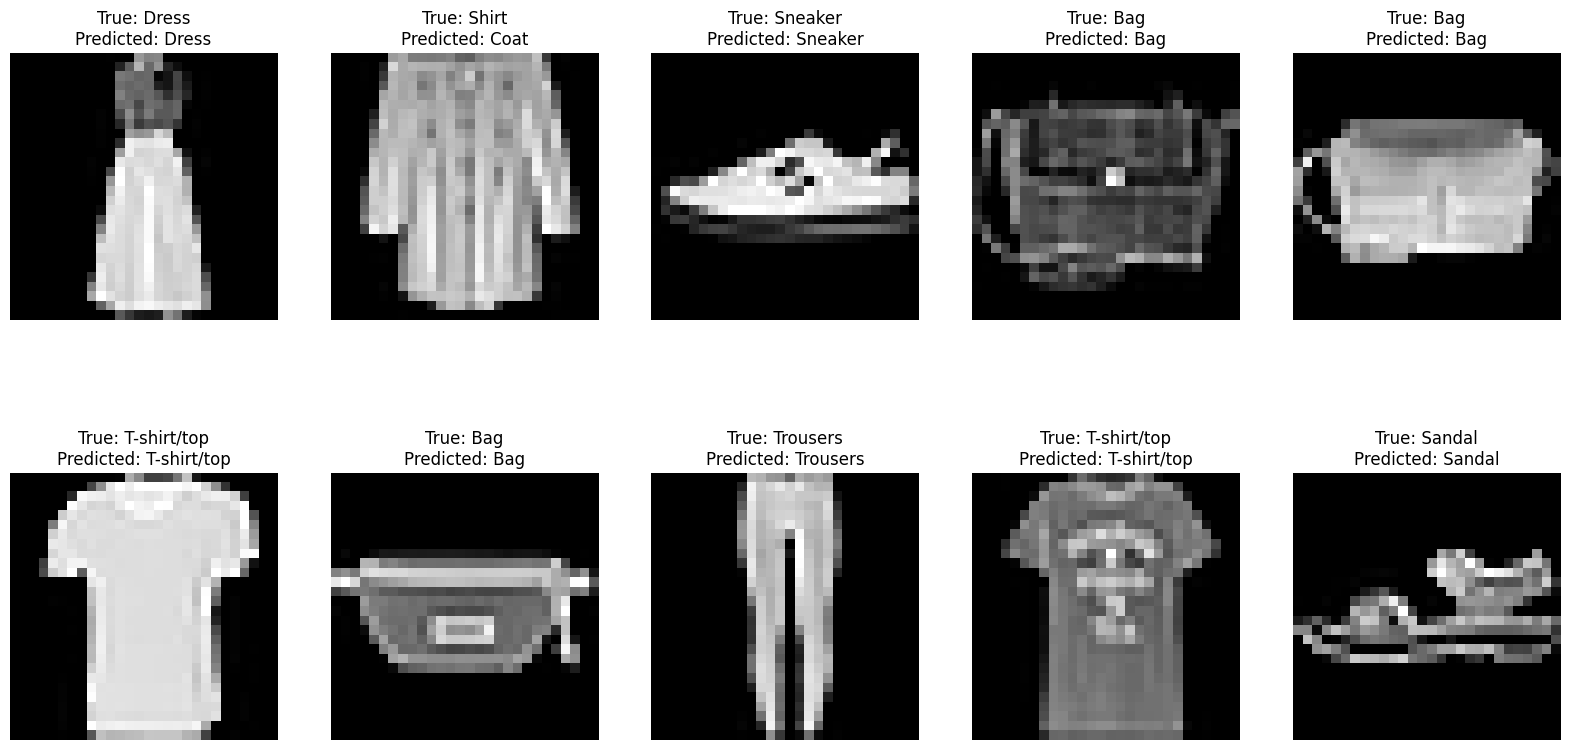

In [47]:
# 14. Visualizing random predictions
plt.figure(figsize=(20, 10))
for i, idx in enumerate(random.sample(range(len(x_test)), 10)):
    img = x_test[idx]
    true_label = class_names[y_test[idx]]
    pred_label = class_names[np.argmax(model.predict(img.reshape(1, 28, 28, 1)))]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}\nPredicted: {pred_label}")
    plt.axis('off')
plt.show()